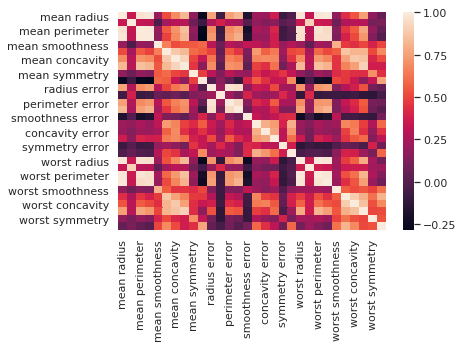

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error as mse
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from utils import *


sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

# Create a dataframe from data
dataset = load_breast_cancer()
df = pd.DataFrame(data=dataset.data, columns=dataset.feature_names).dropna()
y = dataset.target

# I sum all the columns on X
X_train, X_test, y_train, y_test = train_test_split(sumcols(df), y, test_size=.2)

# Check the independence between the independent variables
sns.heatmap(df.corr())
plt.show()

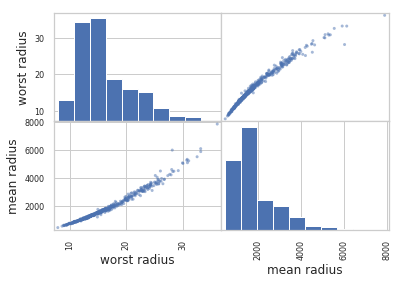

In [3]:
pd.plotting.scatter_matrix(df[['worst radius', 'mean radius']])
plt.show()

### Scikit version

In [9]:
from sklearn.linear_model import LogisticRegression
regr = LogisticRegression(solver='liblinear')
regr.fit(X_train.reshape(-1, 1), y_train)
print( mse(y_test, regr.predict(X_test.reshape(-1, 1))) )

0.07894736842105263


### My version

In [10]:
a, b = get_regr_coeffs(X_train, y_train)

y_hat = 1 / ( 1 + np.exp(-a*X_test - b) )

print( mse(y_test, y_hat) )

0.18620813369083175
